In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('./meteorite-landings.csv')
data.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [45]:
# Change year type to Int
data['year'] = data['year'].astype('Int64')

In [4]:
# drop null value
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38116 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         38116 non-null  object 
 1   id           38116 non-null  int64  
 2   nametype     38116 non-null  object 
 3   recclass     38116 non-null  object 
 4   mass         38116 non-null  float64
 5   fall         38116 non-null  object 
 6   year         38116 non-null  float64
 7   reclat       38116 non-null  float64
 8   reclong      38116 non-null  float64
 9   GeoLocation  38116 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.2+ MB


In [5]:
data.describe()

,id,mass,year,reclat,reclong
count,38116.000000,3.811600e+04,38116.000000,38116.000000,38116.000000
mean,25343.110557,1.560031e+04,1989.957472,-39.594193,61.308320
std,17395.132894,6.286735e+05,26.444565,46.177476,80.776778
min,1.000000,0.000000e+00,601.000000,-87.366670,-165.433330
25%,10831.750000,6.630000e+00,1986.000000,-76.716670,0.000000
50%,21732.500000,2.909000e+01,1996.000000,-71.500000,35.666670
75%,39887.250000,1.874100e+02,2002.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2101.000000,81.166670,178.200000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
print(data['mass'].max())
print(data['mass'].min())

60000000.0
0.0


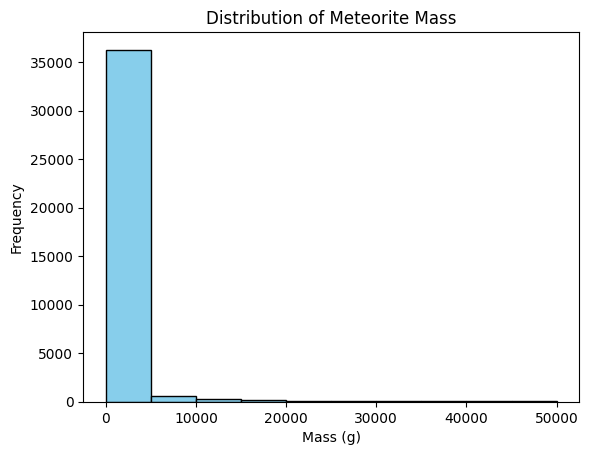

In [8]:
plt.hist(data['mass'], bins=10, color='skyblue', edgecolor='black', range=[0, 50000])
plt.title("Distribution of Meteorite Mass")
plt.xlabel("Mass (g)")
plt.ylabel("Frequency")
plt.show()

[]

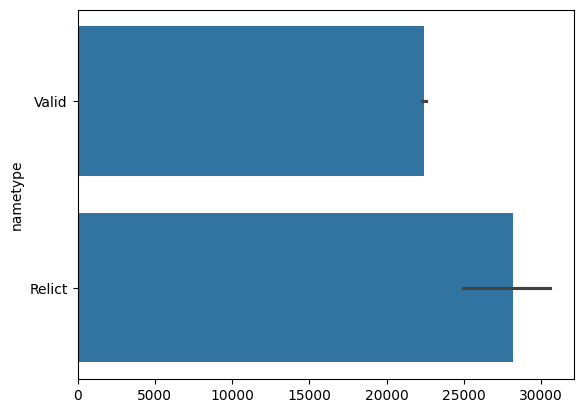

In [9]:
sns.barplot(data = data['nametype'])
plt.plot()

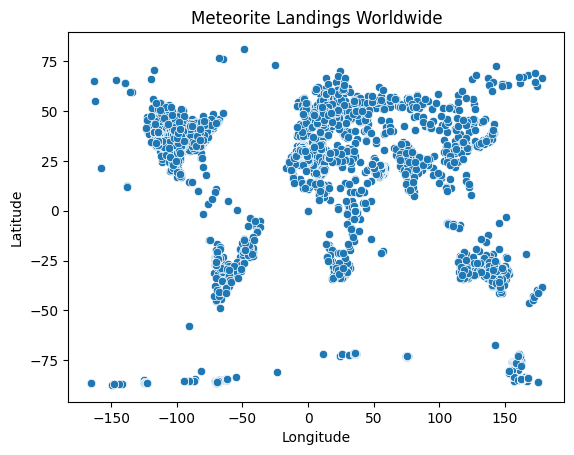

In [10]:
sns.scatterplot(data=data, x='reclong', y='reclat')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Meteorite Landings Worldwide')
plt.show()

In [11]:
# find location from lat and long using Geopy
from geopy.geocoders import Nominatim
import time

# Initialize the geocoder
geolocator = Nominatim(user_agent="geo_app")

# Create function for find location from latitude and longtitude

def findCountry(lat, long):
    try:
        geo = f"{lat}, {long}"  # Format the coordinates
        location = geolocator.reverse(geo)  
        if location and "address" in location.raw:
            return location.raw['address'].get('country', 'Country not found')  # Extract country
        else:
            return "Location not found"
    except Exception as e:
        print(f"An exception occurred: {e}") 
        return "Error occurred"


In [17]:
countries = []
data_range = data.shape[0]

#find coutries in 
for index, row in data.iterrows():
    lat = row['reclat']
    long = row['reclong']
    
    # Check for missing data
    if pd.notnull(lat) and pd.notnull(long):
        country = findCountry(lat, long)  
        countries.append(country)
        time.sleep(0.5)
        print('ye')
    else:
        countries.append("Coordinates missing") 
        print('TT')

print(countries)

ye
ye


KeyboardInterrupt: 

In [51]:
# visualize map
import folium
from folium.plugins import MarkerCluster
from folium.plugins import TagFilterButton

In [61]:
# show first 500 meteorite  

map_center = [data['reclat'].mean(), data['reclong'].mean()]
meteorite_map = folium.Map(location=map_center, zoom_start=2)


for _, row in data.head(500).iterrows():  
    if not pd.isnull(row['reclat']) and not pd.isnull(row['reclong']):
        folium.Marker(
            location=[row['reclat'], row['reclong']],
            popup=folium.Popup(
                f"""
                <b>Name:</b> {row['name']}<br>
                <b>Mass:</b> {row['mass']} g<br>
                <b>Condition:</b> {row['nametype']} <br>
                <b>Class:</b> {row['recclass']} <br>
                <b>Status:</b> {row['fall']} <br>
                <b>Year:</b> {row['year']} 
                """,
                max_width=250,
            ),
        ).add_to(meteorite_map)

# Save the map to an HTML file
output_map_path = 'meteorite_map.html'
meteorite_map.save(output_map_path)
output_map_path

'meteorite_map.html'